In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv('placement.csv')

In [47]:
df.head()

,Student ID,Name,Major,GPA,Technical Skills (Rating 1-5),Soft Skills (Rating 1-5),Internship Experience (Y/N),Previous Projects (Number),Placed (Y/N)
0,10080,E456 Johnson,Business Administration,3.39,3,1,N,0,N
1,10074,U912 Brown,Marketing,3.05,3,2,Y,0,N
2,10038,I367 Smith,Art History,3.98,2,3,N,0,Y
3,10092,U756 Smith,Engineering,3.93,4,4,Y,3,Y
4,10040,A303 Johnson,Electrical Engineering,3.87,1,1,Y,2,N


In [48]:
df.drop(['Student ID', 'Name'], axis = 1, inplace = True)

In [49]:
df.head()

,Major,GPA,Technical Skills (Rating 1-5),Soft Skills (Rating 1-5),Internship Experience (Y/N),Previous Projects (Number),Placed (Y/N)
0,Business Administration,3.39,3,1,N,0,N
1,Marketing,3.05,3,2,Y,0,N
2,Art History,3.98,2,3,N,0,Y
3,Engineering,3.93,4,4,Y,3,Y
4,Electrical Engineering,3.87,1,1,Y,2,N


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Major                          150 non-null    object 
 1   GPA                            150 non-null    float64
 2   Technical Skills (Rating 1-5)  150 non-null    int64  
 3   Soft Skills (Rating 1-5)       150 non-null    int64  
 4   Internship Experience (Y/N)    150 non-null    object 
 5   Previous Projects (Number)     150 non-null    int64  
 6   Placed (Y/N)                   150 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 8.3+ KB


In [51]:
df.isnull().sum()

Major                            0
GPA                              0
Technical Skills (Rating 1-5)    0
Soft Skills (Rating 1-5)         0
Internship Experience (Y/N)      0
Previous Projects (Number)       0
Placed (Y/N)                     0
dtype: int64

In [52]:
df['Internship Experience (Y/N)'] = df['Internship Experience (Y/N)'].map({'Y': 1, 'N' : 0})

In [53]:
df['Placed (Y/N)'] = df['Placed (Y/N)'].map({'N' : 0, 'Y' : 1})

In [54]:
df.head()

,Major,GPA,Technical Skills (Rating 1-5),Soft Skills (Rating 1-5),Internship Experience (Y/N),Previous Projects (Number),Placed (Y/N)
0,Business Administration,3.39,3,1,0,0,0
1,Marketing,3.05,3,2,1,0,0
2,Art History,3.98,2,3,0,0,1
3,Engineering,3.93,4,4,1,3,1
4,Electrical Engineering,3.87,1,1,1,2,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Major                          150 non-null    object 
 1   GPA                            150 non-null    float64
 2   Technical Skills (Rating 1-5)  150 non-null    int64  
 3   Soft Skills (Rating 1-5)       150 non-null    int64  
 4   Internship Experience (Y/N)    150 non-null    int64  
 5   Previous Projects (Number)     150 non-null    int64  
 6   Placed (Y/N)                   150 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 8.3+ KB


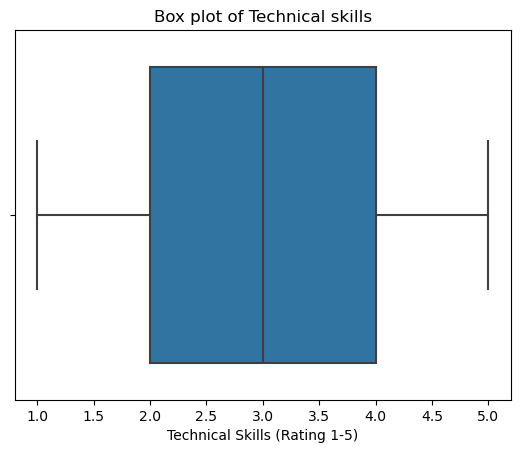

In [56]:
# Create a box plot
sns.boxplot(x=df['Technical Skills (Rating 1-5)'])

# Add a title
plt.title('Box plot of Technical skills')

# Show the plot
plt.show()

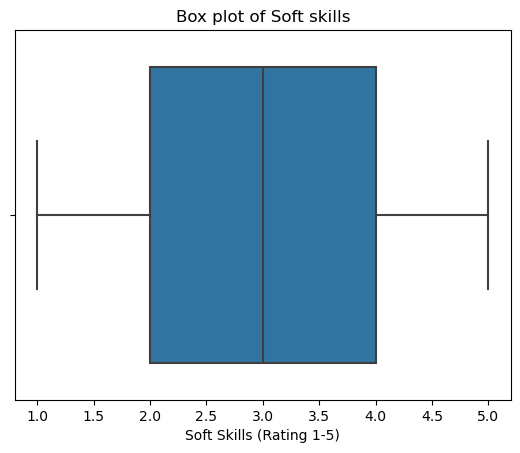

In [57]:
# Create a box plot
sns.boxplot(x=df['Soft Skills (Rating 1-5)'])

# Add a title
plt.title('Box plot of Soft skills')

# Show the plot
plt.show()

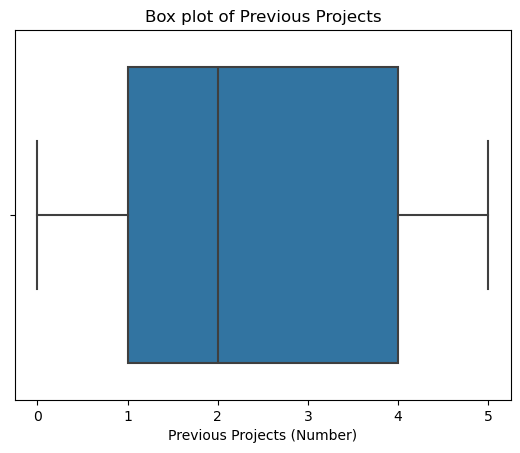

In [58]:
# Create a box plot
sns.boxplot(x=df['Previous Projects (Number)'])

# Add a title
plt.title('Box plot of Previous Projects')

# Show the plot
plt.show()

In [59]:
df['Previous Projects (Number)'].unique()

array([0, 3, 2, 1, 4, 5], dtype=int64)

Text(0, 0.5, 'Count')

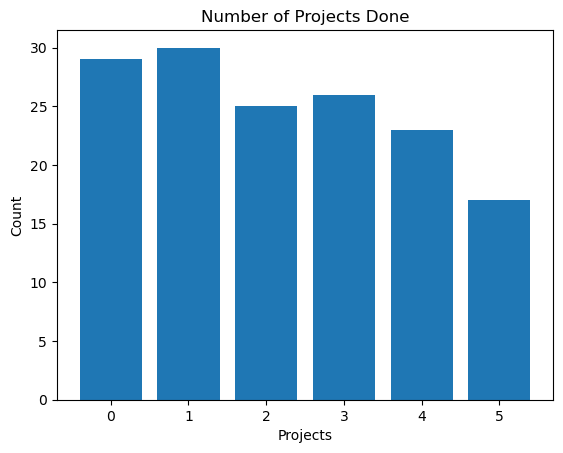

In [60]:
projects_done_counts = df['Previous Projects (Number)'].value_counts()
unique_values = projects_done_counts.index
counts = projects_done_counts.values
plt.bar(unique_values, counts)
plt.title('Number of Projects Done')
plt.xlabel('Projects')
plt.ylabel('Count')

In [61]:
df['Placed (Y/N)'].value_counts()

Placed (Y/N)
0    99
1    51
Name: count, dtype: int64

In [62]:
#Performing upsampling
from sklearn.utils import resample
# Separate majority and minority classes
majority_class = df[df['Placed (Y/N)'] == 0]
minority_class = df[df['Placed (Y/N)'] == 1]

# Upsample the minority class
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([majority_class, minority_upsampled])

# Shuffle the DataFrame
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [63]:
df = df_upsampled

In [64]:
df.head()

,Major,GPA,Technical Skills (Rating 1-5),Soft Skills (Rating 1-5),Internship Experience (Y/N),Previous Projects (Number),Placed (Y/N)
0,Business Administration,3.80,2,3,0,3,0
1,Biotechnology,3.88,1,4,1,2,1
2,Biotechnology,3.50,3,3,1,5,0
3,Data Science,3.64,4,1,1,3,1
4,Biotechnology,3.33,2,4,0,3,1


In [65]:
df['Placed (Y/N)'].value_counts()

Placed (Y/N)
0    99
1    99
Name: count, dtype: int64

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

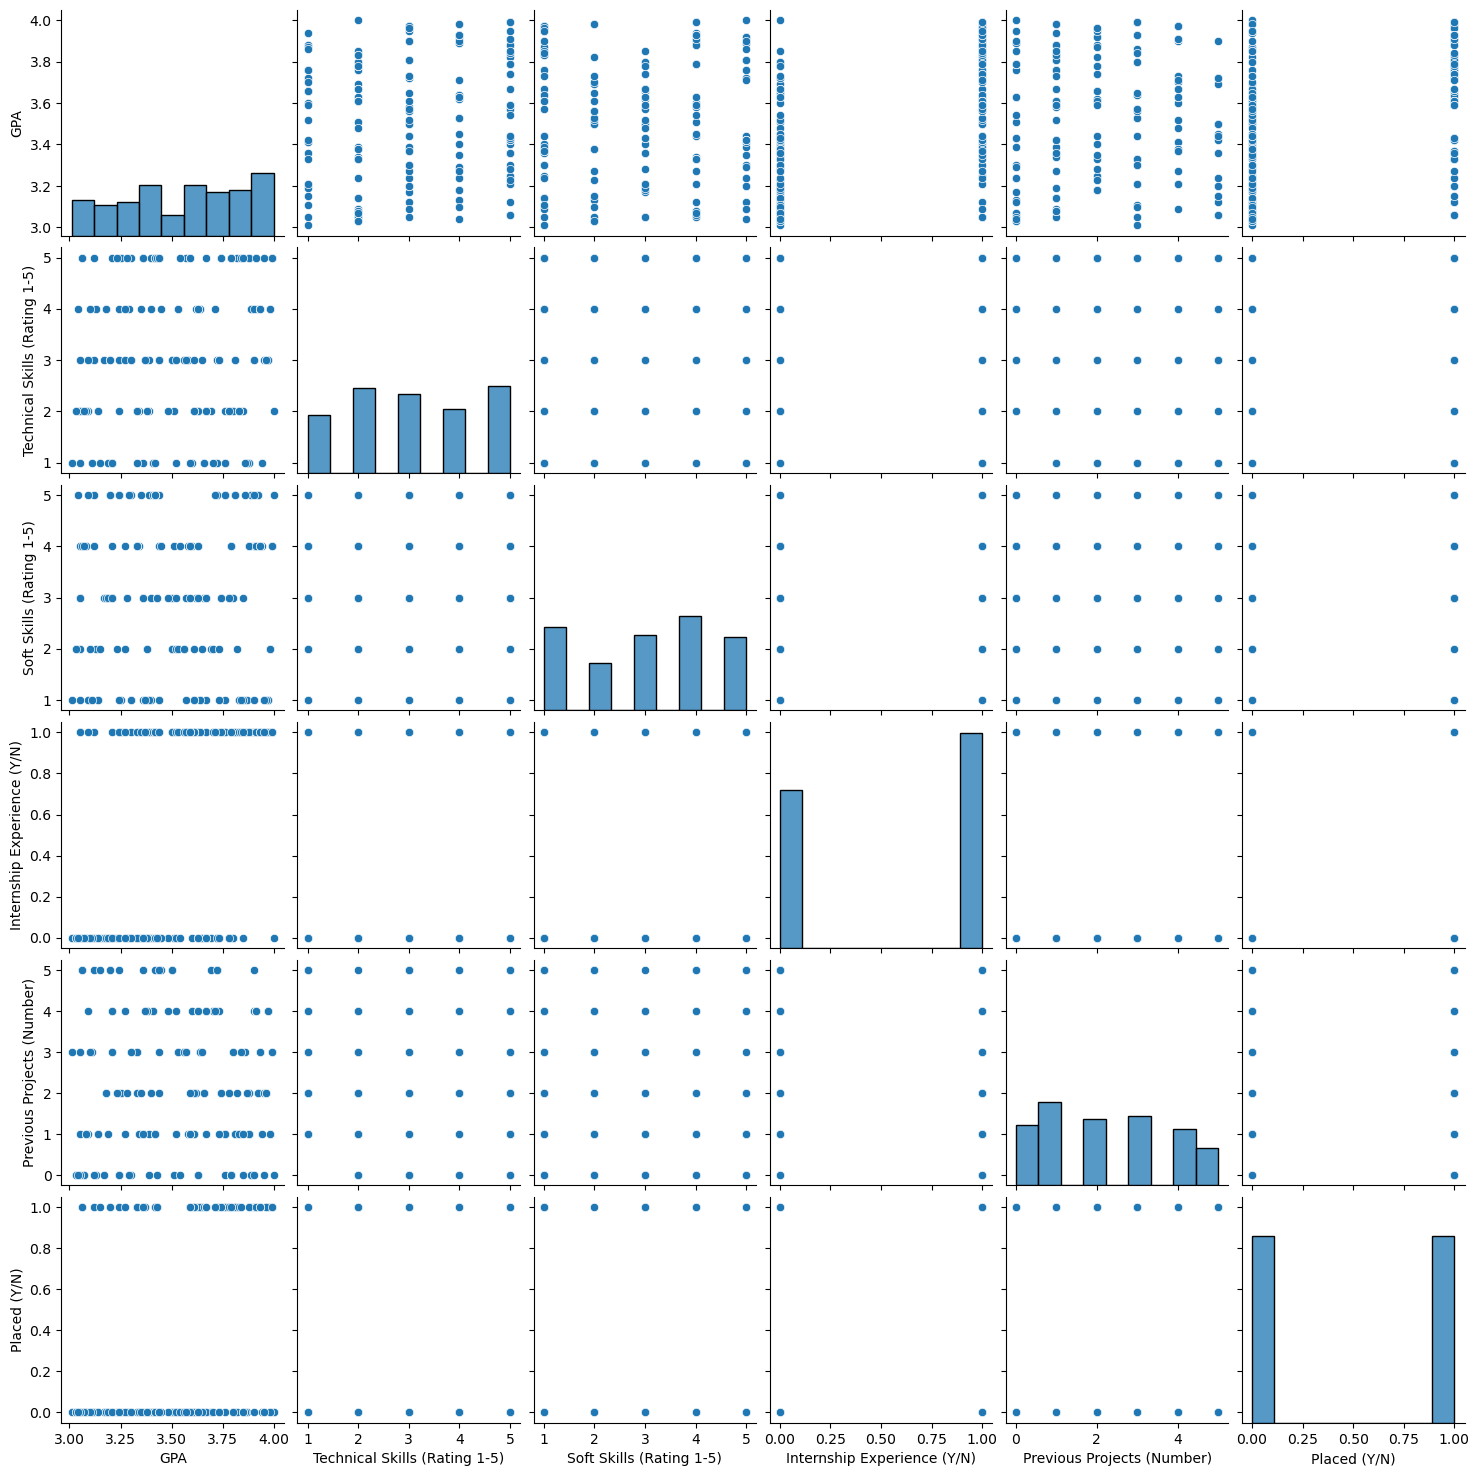

In [66]:
# Visualizing More Data
sns.pairplot(df)
plt.show()

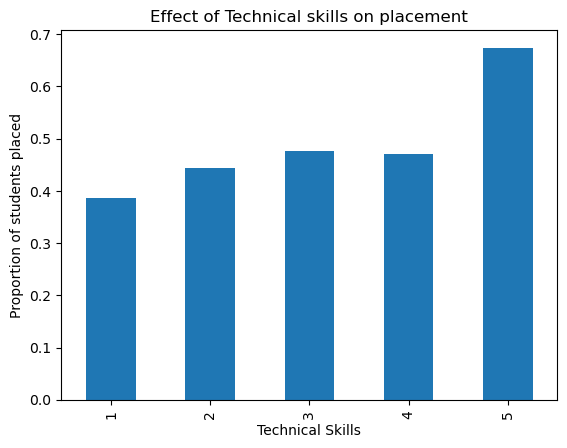

In [67]:
grouped_data = df.groupby('Technical Skills (Rating 1-5)')['Placed (Y/N)'].mean()
grouped_data.plot(kind='bar')
plt.xlabel('Technical Skills')
plt.ylabel('Proportion of students placed')
plt.title('Effect of Technical skills on placement')
plt.show()

### Insigts
- More the technical skills more are the chances of placement

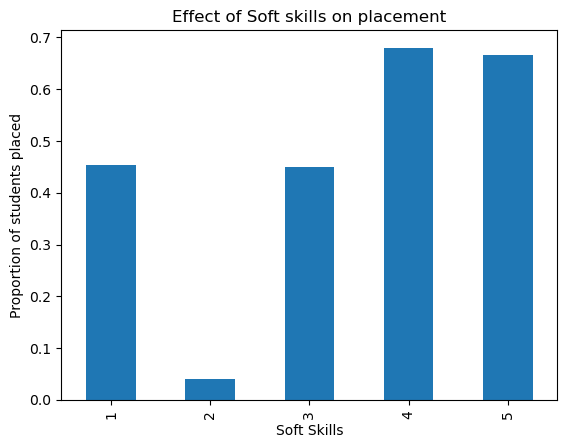

In [68]:
grouped_data = df.groupby('Soft Skills (Rating 1-5)')['Placed (Y/N)'].mean()
grouped_data.plot(kind='bar')
plt.xlabel('Soft Skills')
plt.ylabel('Proportion of students placed')
plt.title('Effect of Soft skills on placement')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Soft Skills (Rating 1-5)', ylabel='Count'>

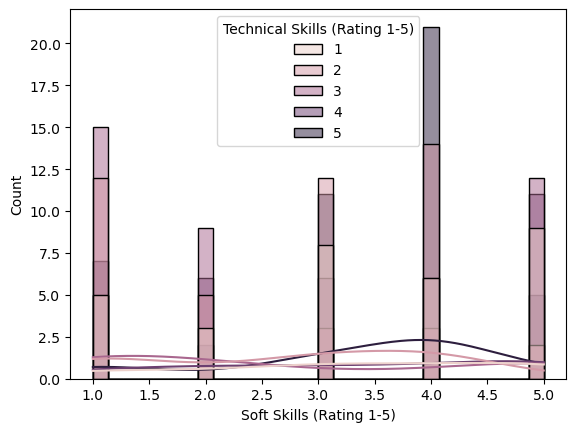

In [69]:
sns.histplot(data = df[df['Placed (Y/N)'] == 1], x = df['Soft Skills (Rating 1-5)'], hue = df['Technical Skills (Rating 1-5)'], bins = 30, kde = True)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GPA', ylabel='Count'>

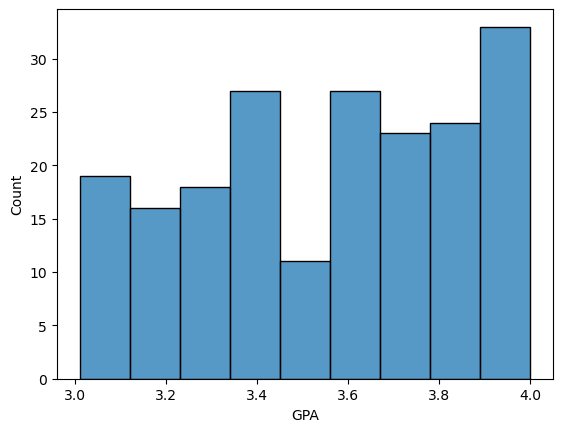

In [70]:
sns.histplot(data = df[df['Placed (Y/N)'] == 1], x = df['GPA'])

C:\Users\harsh\AppData\Local\Temp\ipykernel_20460\1084124126.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GPA'])
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GPA', ylabel='Density'>

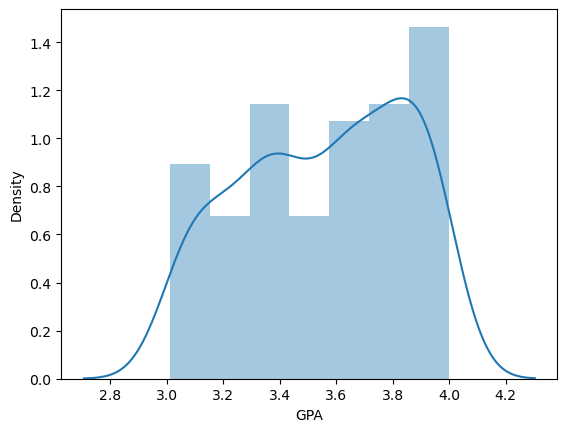

In [71]:
sns.distplot(df['GPA'])

C:\Users\harsh\AppData\Local\Temp\ipykernel_20460\258711830.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Soft Skills (Rating 1-5)'])
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Soft Skills (Rating 1-5)', ylabel='Density'>

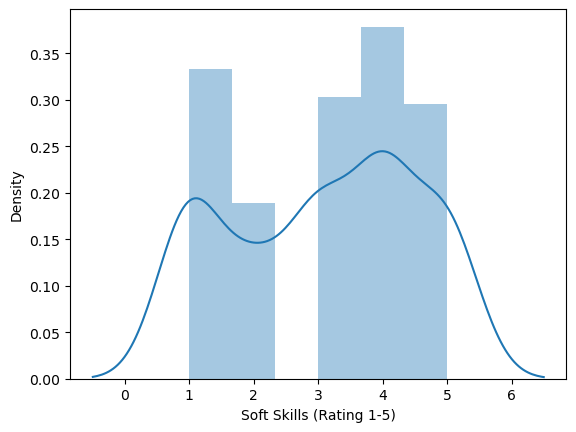

In [72]:
sns.distplot(df['Soft Skills (Rating 1-5)'])

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


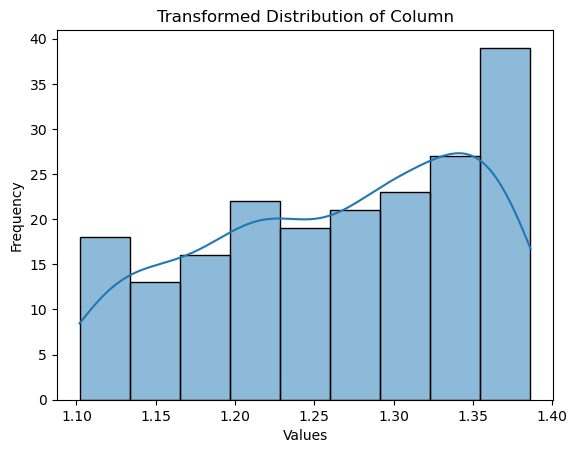

In [73]:
df['transformed_GPA'] = np.log(df['GPA'])

# Visualize the transformed data
sns.histplot(data=df, x='transformed_GPA', kde=True)
plt.title('Transformed Distribution of Column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='transformed_GPA', ylabel='Count'>

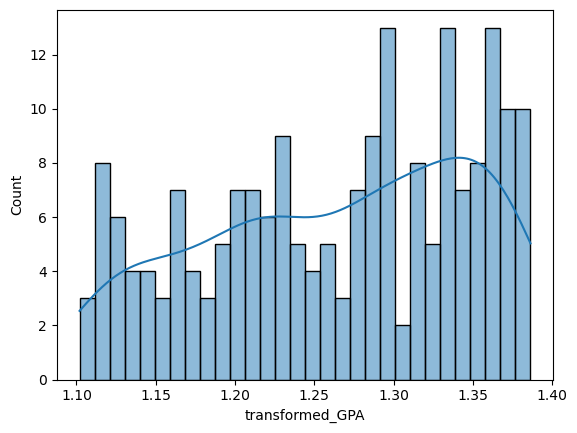

In [74]:
sns.histplot(data = df[df['Placed (Y/N)'] == 1], x = df['transformed_GPA'], bins = 30, kde = True)

### Insight
- After transforming gpa column data becomes more right skewness

In [75]:
df.head()

,Major,GPA,Technical Skills (Rating 1-5),Soft Skills (Rating 1-5),Internship Experience (Y/N),Previous Projects (Number),Placed (Y/N),transformed_GPA
0,Business Administration,3.80,2,3,0,3,0,1.335001
1,Biotechnology,3.88,1,4,1,2,1,1.355835
2,Biotechnology,3.50,3,3,1,5,0,1.252763
3,Data Science,3.64,4,1,1,3,1,1.291984
4,Biotechnology,3.33,2,4,0,3,1,1.202972


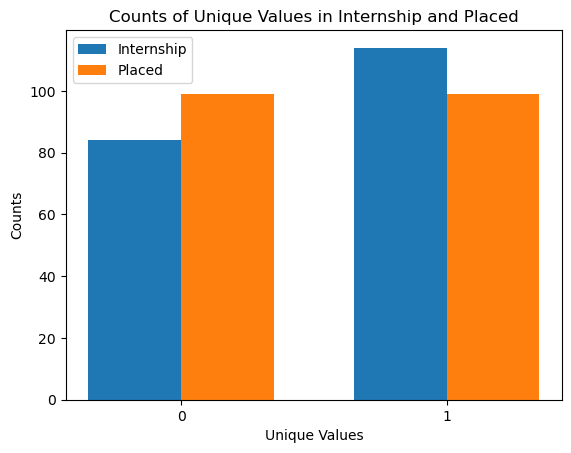

In [76]:
counts_column1 = df['Internship Experience (Y/N)'].value_counts()
counts_column2 = df['Placed (Y/N)'].value_counts()

# Get unique values
unique_values = counts_column1.index.tolist()

# Set width of the bars
bar_width = 0.35

# Plotting bar chart for each column
plt.bar(unique_values, counts_column1.values, bar_width, label='Internship')
plt.bar([x + bar_width for x in unique_values], counts_column2.values, bar_width, label='Placed')

# Add labels and title
plt.xlabel('Unique Values')
plt.ylabel('Counts')
plt.title('Counts of Unique Values in Internship and Placed')
plt.xticks([x + bar_width / 2 for x in unique_values], unique_values)
plt.legend()

# Show the plot
plt.show()


### Insights
- The number of students who did internship are more than the students who did done any internship
- Number of students which are not placed is more than number of students who did not done internship
- Number of students who are placed is less than the number of students who did internship

In [77]:
df.head()

,Major,GPA,Technical Skills (Rating 1-5),Soft Skills (Rating 1-5),Internship Experience (Y/N),Previous Projects (Number),Placed (Y/N),transformed_GPA
0,Business Administration,3.80,2,3,0,3,0,1.335001
1,Biotechnology,3.88,1,4,1,2,1,1.355835
2,Biotechnology,3.50,3,3,1,5,0,1.252763
3,Data Science,3.64,4,1,1,3,1,1.291984
4,Biotechnology,3.33,2,4,0,3,1,1.202972


In [78]:
df['Major'].unique()

array(['Business Administration', 'Biotechnology', 'Data Science',
       'Finance', 'Marketing', 'Art History', 'Computer Science',
       'Engineering', 'Electrical Engineering', 'Software Engineering'],
      dtype=object)

In [79]:
df['Major'].value_counts()

Major
Electrical Engineering     28
Finance                    26
Business Administration    22
Art History                22
Biotechnology              21
Data Science               21
Computer Science           20
Software Engineering       17
Marketing                  12
Engineering                 9
Name: count, dtype: int64

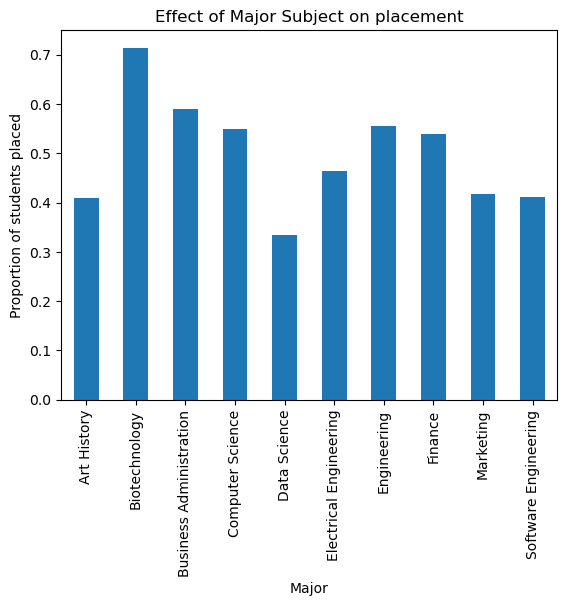

In [80]:
grouped_data = df.groupby('Major')['Placed (Y/N)'].mean()
grouped_data.plot(kind='bar')
plt.xlabel('Major')
plt.ylabel('Proportion of students placed')
plt.title('Effect of Major Subject on placement')
plt.show()

In [81]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the categorical column
one_hot_encoded = encoder.fit_transform(df[['Major']])

# Convert the encoded array into a DataFrame
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Major']))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([df, one_hot_df], axis=1)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [82]:
df.head()

,Major,GPA,Technical Skills (Rating 1-5),Soft Skills (Rating 1-5),Internship Experience (Y/N),Previous Projects (Number),Placed (Y/N),transformed_GPA,Major_Art History,Major_Biotechnology,Major_Business Administration,Major_Computer Science,Major_Data Science,Major_Electrical Engineering,Major_Engineering,Major_Finance,Major_Marketing,Major_Software Engineering
0,Business Administration,3.80,2,3,0,3,0,1.335001,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Biotechnology,3.88,1,4,1,2,1,1.355835,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Biotechnology,3.50,3,3,1,5,0,1.252763,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Data Science,3.64,4,1,1,3,1,1.291984,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Biotechnology,3.33,2,4,0,3,1,1.202972,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
df.drop(['Major', 'GPA'], axis = 1, inplace = True)

In [84]:
df.head()

,Technical Skills (Rating 1-5),Soft Skills (Rating 1-5),Internship Experience (Y/N),Previous Projects (Number),Placed (Y/N),transformed_GPA,Major_Art History,Major_Biotechnology,Major_Business Administration,Major_Computer Science,Major_Data Science,Major_Electrical Engineering,Major_Engineering,Major_Finance,Major_Marketing,Major_Software Engineering
0,2,3,0,3,0,1.335001,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4,1,2,1,1.355835,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3,1,5,0,1.252763,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,1,3,1,1.291984,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2,4,0,3,1,1.202972,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
df.corr()

,Technical Skills (Rating 1-5),Soft Skills (Rating 1-5),Internship Experience (Y/N),Previous Projects (Number),Placed (Y/N),transformed_GPA,Major_Art History,Major_Biotechnology,Major_Business Administration,Major_Computer Science,Major_Data Science,Major_Electrical Engineering,Major_Engineering,Major_Finance,Major_Marketing,Major_Software Engineering
Technical Skills (Rating 1-5),1.000000,0.074764,0.256880,-0.136470,0.177433,0.149302,0.090897,-0.117778,0.240686,0.109119,0.058622,-0.100666,0.019755,-0.187570,0.088756,-0.163263
Soft Skills (Rating 1-5),0.074764,1.000000,-0.047368,-0.063937,0.264569,0.025599,-0.052382,0.039056,0.172112,0.169563,-0.098420,-0.061969,0.039259,-0.114574,0.001344,-0.066583
Internship Experience (Y/N),0.256880,-0.047368,1.000000,-0.065877,0.224818,0.505812,-0.054194,-0.069392,0.010839,0.186000,0.063358,0.055099,0.089199,-0.120110,-0.081762,-0.065215
Previous Projects (Number),-0.136470,-0.063937,-0.065877,1.000000,0.066952,0.006003,0.188242,-0.012394,-0.166825,0.222714,-0.167705,-0.118299,0.027133,0.033659,-0.039680,0.054544
Placed (Y/N),0.177433,0.264569,0.224818,0.066952,1.000000,0.445518,-0.064282,0.147620,0.064282,0.033520,-0.114816,-0.028989,0.024246,0.029907,-0.042333,-0.054083
transformed_GPA,0.149302,0.025599,0.505812,0.006003,0.445518,1.000000,-0.070463,0.068979,0.047585,0.122375,-0.038249,0.080281,0.182210,-0.165354,-0.155684,-0.043129
Major_Art History,0.090897,-0.052382,-0.054194,0.188242,-0.064282,-0.070463,1.000000,-0.121781,-0.125000,-0.118511,-0.121781,-0.143486,-0.077152,-0.137460,-0.089803,-0.108353
Major_Biotechnology,-0.117778,0.039056,-0.069392,-0.012394,0.147620,0.068979,-0.121781,1.000000,-0.121781,-0.115459,-0.118644,-0.139790,-0.075165,-0.133920,-0.087490,-0.105562
Major_Business Administration,0.240686,0.172112,0.010839,-0.166825,0.064282,0.047585,-0.125000,-0.121781,1.000000,-0.118511,-0.121781,-0.143486,-0.077152,-0.137460,-0.089803,-0.108353
Major_Computer Science,0.109119,0.169563,0.186000,0.222714,0.033520,0.122375,-0.118511,-0.115459,-0.118511,1.000000,-0.115459,-0.136038,-0.073147,-0.130325,-0.085141,-0.102728


<Axes: >

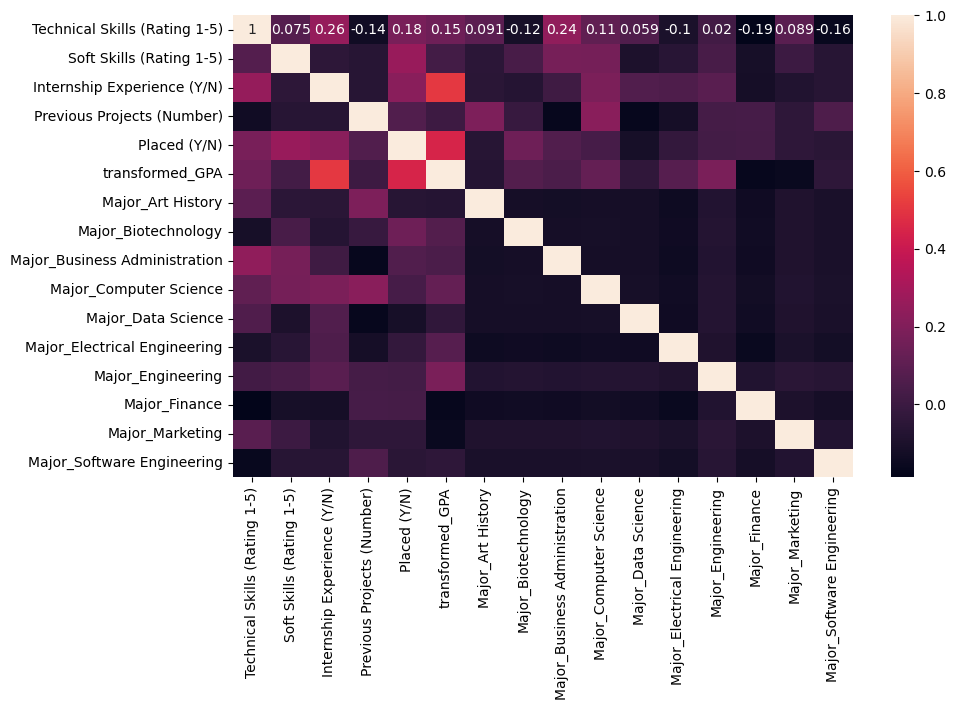

In [86]:
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), annot = True)

In [87]:
# Creating model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


df.columns = df.columns.astype(str)

# Assuming your dataset is prepared with features and the target variable 'Laid_Off'
# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['Placed (Y/N)'])  # Features
y = df['Placed (Y/N)']  # Target variable

# Encode categorical features if necessary
# Example:
# label_encoder = LabelEncoder()
# X['categorical_feature'] = label_encoder.fit_transform(X['categorical_feature'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42))
]

# Initialize variables to store the best model and its accuracy
best_model = None
best_accuracy = 0

# Iterate over each model
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the testing set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model_name}, Accuracy: {accuracy}")

    # Update the best model if the current model has higher accuracy
    if accuracy > best_accuracy:
        best_model = model
        best_accuracy = accuracy

# Evaluate the best model
if best_model is not None:
    print("\nBest Model:")
    print(best_model)
    print("Best Accuracy:", best_accuracy)
    print("Classification Report:")
    y_pred = best_model.predict(X_test)
    print(classification_report(y_test, y_pred))
else:
    print("No best model found.")

Model: Random Forest, Accuracy: 0.875
Model: Logistic Regression, Accuracy: 0.825
Model: Support Vector Machine, Accuracy: 0.8

Best Model:
RandomForestClassifier(random_state=42)
Best Accuracy: 0.875
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.78      0.93      0.85        15

    accuracy                           0.88        40
   macro avg       0.87      0.89      0.87        40
weighted avg       0.89      0.88      0.88        40



In [88]:
import pickle

# Save the best model (Random Forest) to a pickle file
with open('placement_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)